# Open Loop

[A1 - First trial selection](#A1)

[A3 - Order of presentation during training](#A3)

[A4 - Performance during training](#A4)

[A5 - Learning Progress](#A5)

[A6 - Relative performance during training](#A6)

[A7 - Relative Learning Progress](#A7)

## Set-up and Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import pandas as pd
import warnings

from scipy.stats import beta

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)

import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

/usr/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Load per trial data files

In [2]:
execute_notebook("file-preprocessing.ipynb")

[b'free']


In [3]:
tasks = 4
catLab = ['1D', 'I1D', '2D', 'R']

usersF = np.shape(np.unique(csvIntF[:,0]))[0]
# For free exploration with Training
usersFT = np.shape(np.unique(csvIntFT[:,0]))[0]
usersFTI = np.shape(np.unique(informed[:,0]))[0]
usersFTU = usersFT-usersFTI
# For strategic learning
usersS = np.shape(np.unique(csvIntS[:,0]))[0]
usersSI = np.shape(np.unique(informedSE[:,0]))[0]
usersSU = usersS-usersSI

#### Load combined data

In [4]:
execute_notebook("file-preprocessing-reported-answers.ipynb")

Free Exploration - general metrics loaded
Free Exploration with Training - general metrics loaded
Strategic Learning - general metrics loaded


#### Split by information (free exp with training)

In [5]:
#user(0), cond(1) cat-task complexity(2), # task selec(3), % sele(4), # correct on task(5), % correct(6), 
#answers(7:12)

# Split by users that received information about the existence of a random task and those that didn't
informedFT = freeT[freeT[:,1]==0]
uninformedFT = freeT[freeT[:,1]==1]
#print(spilot[-1,:])
# Remove column 
freeT = np.delete(freeT, 1, axis=1)
informedFT = np.delete(informedFT, 1, axis=1)
uninformedFT = np.delete(uninformedFT, 1, axis=1)
free = np.delete(free, 1, axis=1)

(796, 7) (796, 14)
(396, 15) (400, 15)


#### Split by information (strategic learning)

In [6]:
# Split by users that received information about the existence of a random task and those that didn't
informedS = stra[stra[:,1]==0]
uninformedS = stra[stra[:,1]==1]
#print(spilot[-1,:])
# Remove column (condition)
stra = np.delete(stra, 1, axis=1)
informedS = np.delete(informedS, 1, axis=1)
uninformedS = np.delete(uninformedS, 1, axis=1)

(804, 7) (804, 13) (804, 13)
(400, 16) (404, 16)


<a id='A1'></a>
## A1 - First trial selection

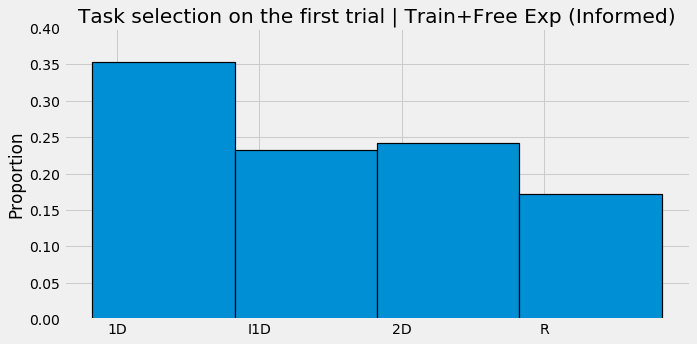

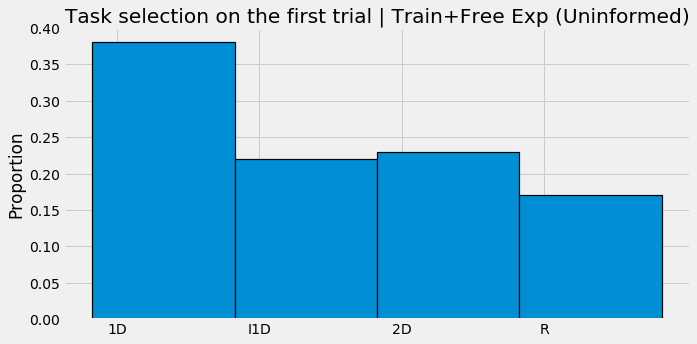

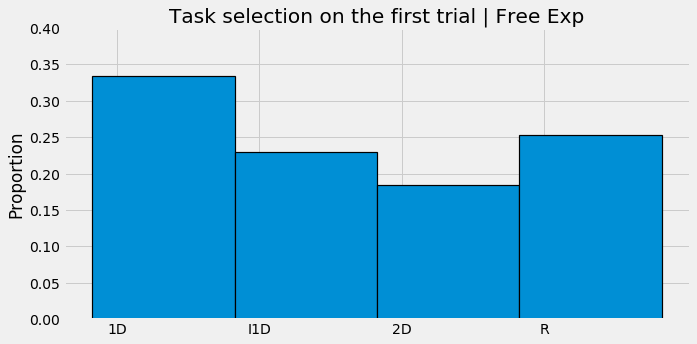

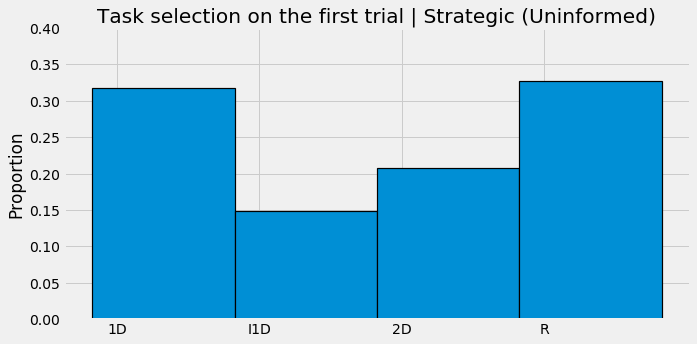

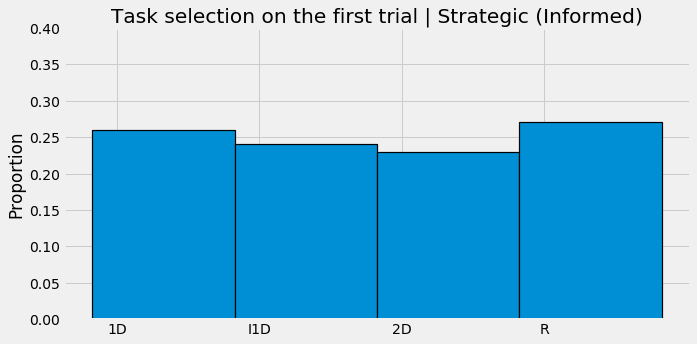

In [8]:
def checkFirstOption(arr, usersArr, checkIncomplete=False):
    firstSelec = []
    incomplete = []
    for u in range(usersArr):
        # If it's necessary to check those that didn't explore all tasks (e.g. free exploration only)
        if checkIncomplete:
            questions = arr[u]
            # Count number of times a task was selected
            task, ctask = np.unique(questions[:,1], return_counts=True)

            # Check if it explored all tasks
            if len(task) < 4:
                incomplete.append(u)
            else:
                firstSelec.append(arr[u][0,1])
        else:
            firstSelec.append(arr[u][0,1])
            
    # Return also a list of people who didn't explore all tasks
    return np.asarray(firstSelec), incomplete
    
def plotFirstOption(arr, usersArr, label, checkIncomplete=False):
    firstSelec, _ = checkFirstOption(arr, usersArr, checkIncomplete)
    
    ind = np.arange(tasks)  # the x locations for the groups
    width = 0.35       # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.hist(firstSelec, bins=np.arange(5), normed=True, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection on the first trial | ', label]))
    ax.set_ylabel('Proportion')
    #ax.set_xlabel('t')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1D', 'I1D', '2D', 'R'))
    ax.set_ylim([0,0.4])

#plotFirstOption(splitCsvFTE, usersFT, 'Train+Free Exp (All)')
plotFirstOption(splitCsvFTI, usersFTI, 'Train+Free Exp (Informed)')
plotFirstOption(splitCsvFTU, usersFTU, 'Train+Free Exp (Uninformed)')
plotFirstOption(splitCsvF, usersF, 'Free Exp', checkIncomplete=True)
plotFirstOption(splitCsvSU, usersSU, 'Strategic (Uninformed)')
plotFirstOption(splitCsvSI, usersSI, 'Strategic (Informed)')

<a id='A3'></a>
## A3 - Order of presentation during training

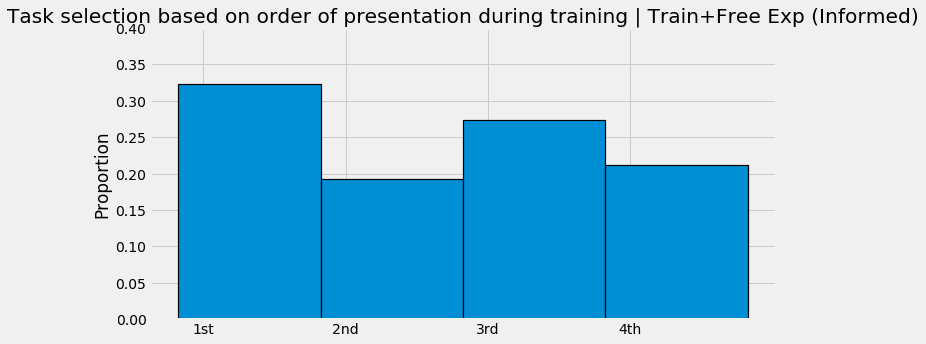

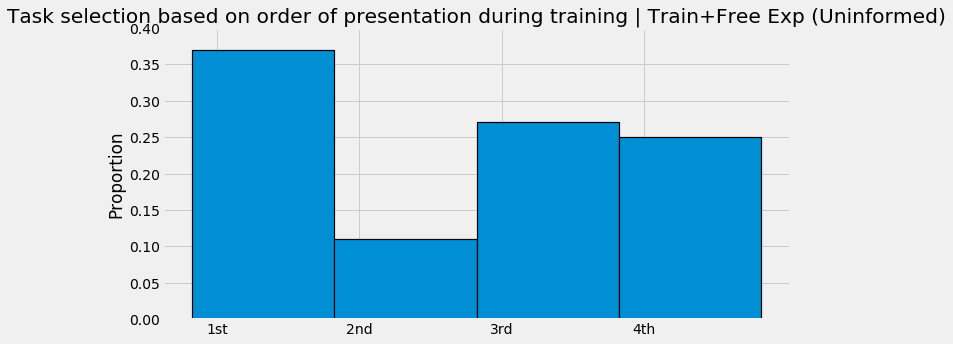

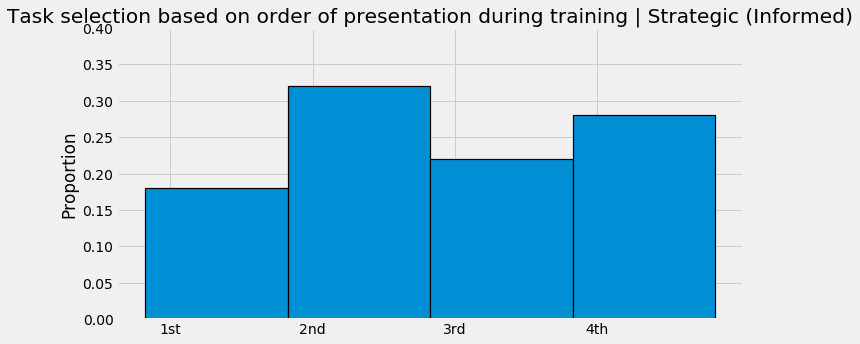

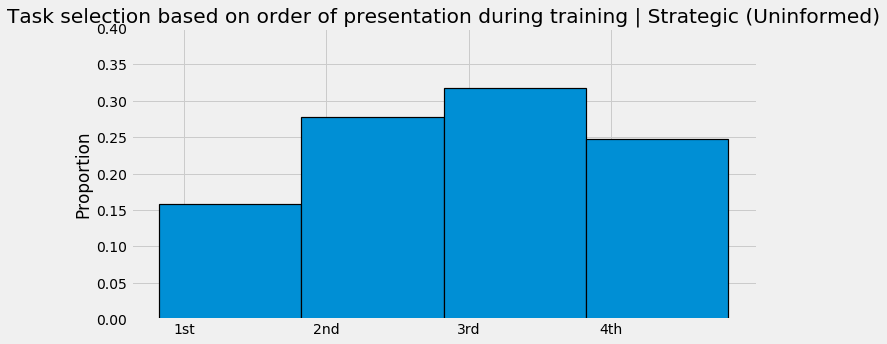

In [10]:
#A3. Order of presentation during training: % ppl who selected the first task they saw during training, 
#the 2nd task, the 3rd, and the 4th. We may see a uniform distributions, or peaks at 1 and 4. 

#ids, informed, phases, categories, correct
# Split by informed or uninformed
a3FTI = csvIntFT[csvIntFT[:,1] == 0,:]
a3FTU = csvIntFT[csvIntFT[:,1] == 1,:]
# Split by user
splita3FTI = [a3FTI[a3FTI[:,0]==i] for i in np.unique(a3FTI[:,0])]
splita3FTU = [a3FTU[a3FTU[:,0]==i] for i in np.unique(a3FTU[:,0])]

a3SI = csvIntS[csvIntS[:,1] == 0,:]
a3SU = csvIntS[csvIntS[:,1] == 1,:]
# Split by user
splita3SI = [a3SI[a3SI[:,0]==i] for i in np.unique(a3SI[:,0])]
splita3SU = [a3SU[a3SU[:,0]==i] for i in np.unique(a3SU[:,0])]

def getFirstSelecOrder(arr, usersArr, strategic=False):
    if strategic:
        trVal = 2
    else:
        trVal = 1
    orderSelec = []
    for u in range(usersArr):
        tmp = arr[u]
        # Get only training part
        # for strategic learning this should be 2
        tmpPhase = tmp[tmp[:,2] == trVal,:]
        # Pass task column and get order indices then get order
        orderIndex = np.unique(tmpPhase[:,3], return_index=True)[1]
        orderTaskUser = [tmpPhase[ind, 3] for ind in sorted(orderIndex)]
        # Get only exploration part
        tmpPhase = tmp[tmp[:,2] == 0,:]
        firstSelec = tmpPhase[0,3]
        # Match that first selection to the order in which it showed up during training
        orderTrain = np.where(orderTaskUser == firstSelec)[0][0]
        #print(orderTaskUser, firstSelec, orderTrain)
        orderSelec.append(orderTrain)
    return orderSelec

def plotFirstSelecOrder(arr, usersArr, label, strategic=False):
    orderSelec = getFirstSelecOrder(arr, usersArr, strategic)
    #print(np.shape(orderSelec), orderSelec)
    
    ind = np.arange(tasks)  # the x locations for the groups
    width = 0.35       # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.hist(orderSelec, bins=np.arange(5), normed=True, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection based on order of presentation during training | ', label]))
    ax.set_ylabel('Proportion')
    #ax.set_xlabel('t')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1st', '2nd', '3rd', '4th'))
    ax.set_ylim([0,0.4])

plotFirstSelecOrder(splita3FTI, usersFTI, 'Train+Free Exp (Informed)')
plotFirstSelecOrder(splita3FTU, usersFTU, 'Train+Free Exp (Uninformed)')
plotFirstSelecOrder(splita3SI, usersSI, 'Strategic (Informed)')
plotFirstSelecOrder(splita3SU, usersSU, 'Strategic (Uninformed)')

<a id='A4'></a>
## A4 - Performance during training

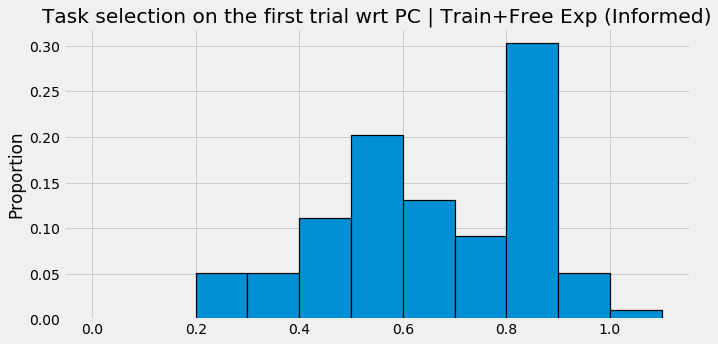

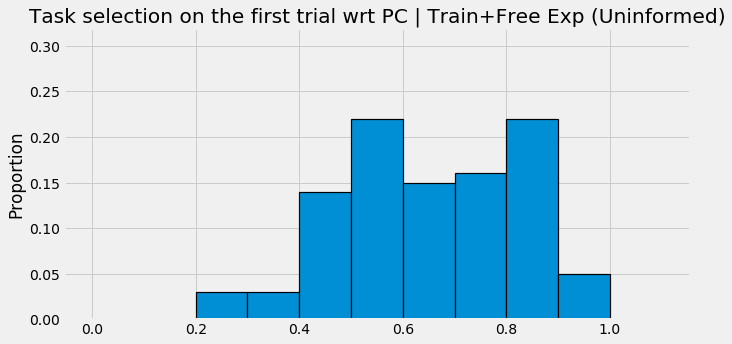

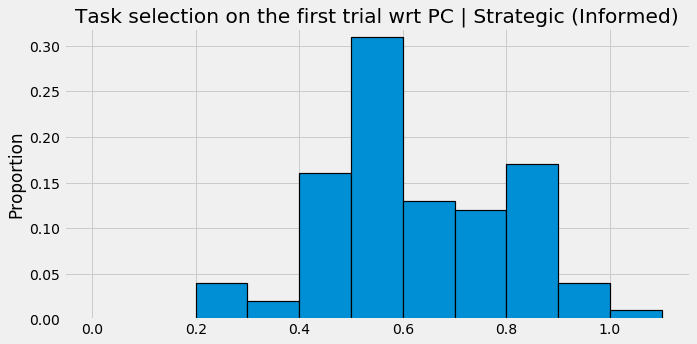

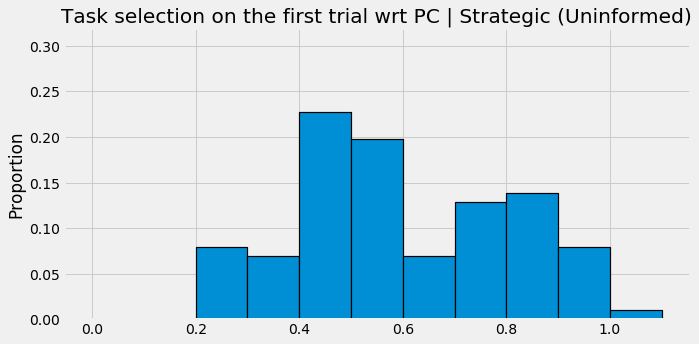

In [12]:
#A4. Performance during training: calculate %correct during the 15 training trials, bin the percentages, 
#and plot the % of ppl who selected a task with the PC in each bin. 

#user(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5), answers(6:11)
# # correct (5), % correct (6)

# Split those informed and those uninformed. (col 1)
ift = freeTTr[freeTTr[:,1]==0,:]
uft = freeTTr[freeTTr[:,1]==1,:]
istr = straTr[straTr[:,1]==0,:]
ustr = straTr[straTr[:,1]==1,:]

# Get task first selections
selFTI = checkFirstOption(splitCsvFTI, usersFTI)
selFTU = checkFirstOption(splitCsvFTU, usersFTU)
selSI = checkFirstOption(splitCsvSI, usersSI)
selSU = checkFirstOption(splitCsvSU, usersSU)

# Get training pc of the first task selected
def checkPerformance(arr, firstSelec):
    usersArr = len(np.unique(arr[:,0]))
    # Split by user
    splitArr = [arr[arr[:,0]==i] for i in np.unique(arr[:,0])]
    # Stores percentage correct during training of the task that later on was selected first on free exploration
    pcTrain = []
    # Go through every user and only extract the PC of the first task selected
    for u in range(usersArr):
        sub = splitArr[u]
        # get only % correct of the row that corresponds to first selection
        tmprow = sub[sub[:,2] == firstSelec[0].tolist()[u],6]
        pcTrain.append(tmprow[0])
    return pcTrain

def plotPerformance(arr, firstSelec, label):
    
    performance = checkPerformance(arr, firstSelec)
    
    # Create bins (0 - 1 in 0.1 steps)
    binsPC = np.linspace(0,1.1,12)
    fig, ax = plt.subplots(figsize=(10, 5))
    # Normalize to sum 1
    weights = np.ones_like(performance)/len(performance)
    plt.hist(performance, bins=binsPC, weights=weights, edgecolor='black', linewidth=1.2)
    
    #plt.hist(performance, bins=binsPC, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection on the first trial wrt PC | ', label]))
    ax.set_ylabel('Proportion')
    ax.set_ylim([0,0.32])

        
# Verification
plotPerformance(ift,selFTI, 'Train+Free Exp (Informed)')
plotPerformance(uft,selFTU, 'Train+Free Exp (Uninformed)')
plotPerformance(istr,selSI, 'Strategic (Informed)')
plotPerformance(ustr,selSU, 'Strategic (Uninformed)')


<a id='A6'></a>
## A6 - Relative performance during training

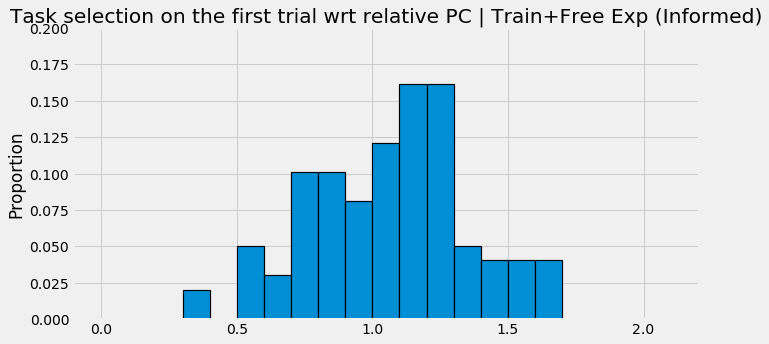

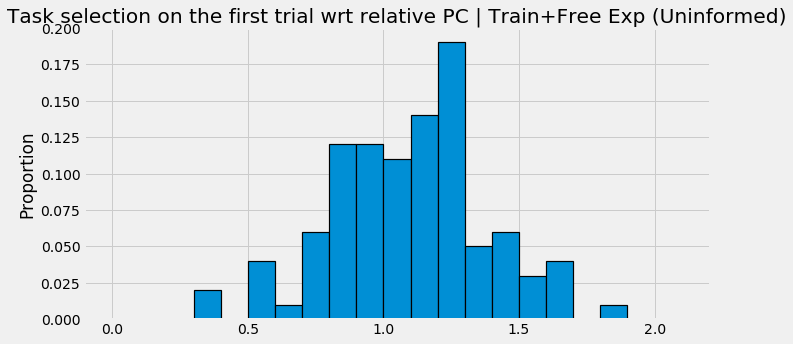

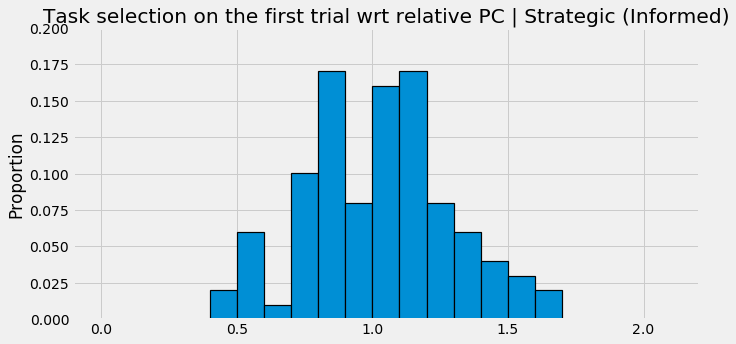

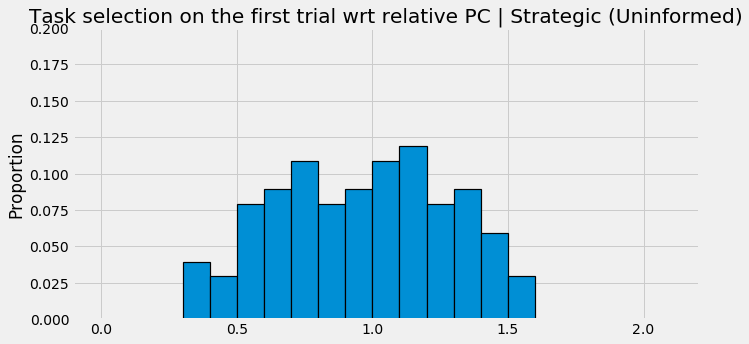

In [13]:
#A6. Relative performance during training: for each participant, take the value representing the PC for 
#each task during training, and normalize it by the mean PC across all 4 tasks. Plot the % of ppl who 
#selected a task as a function of its normalized PC.

# Get relative training pc of the first task selected
def checkRelativePerformance(arr, firstSelec):
    usersArr = len(np.unique(arr[:,0]))
    # Split by user
    splitArr = [arr[arr[:,0]==i] for i in np.unique(arr[:,0])]
    # Stores percentage correct during training of the task that later on was selected first on free exploration
    # Normalized
    pcTrain = []
    # Go through every user and only extract the PC of the first task selected
    for u in range(usersArr):
        sub = splitArr[u]
        # get only % correct of the row that corresponds to first selection
        tmprow = sub[sub[:,2] == firstSelec[0].tolist()[u],6]
        # get % correct of all tasks and calculate mean
        pcNorm = np.mean(sub[:,6])
        # Append normalized pc
        pcTrain.append(tmprow[0]/pcNorm)
    return pcTrain

def plotRelativePerformance(arr, firstSelec, label):
    
    performance = checkRelativePerformance(arr, firstSelec)
    
    # Create bins (0 - 1 in 0.1 steps)
    binsPC = np.linspace(0,2.1,22)
    fig, ax = plt.subplots(figsize=(10, 5))
    # Normalize to sum 1
    weights = np.ones_like(performance)/len(performance)
    plt.hist(performance, bins=binsPC, weights=weights, edgecolor='black', linewidth=1.2)
    
    #plt.hist(performance, bins=binsPC, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection on the first trial wrt relative PC | ', label]))
    ax.set_ylabel('Proportion')
    ax.set_ylim([0,0.2])
    
plotRelativePerformance(ift,selFTI, 'Train+Free Exp (Informed)')
plotRelativePerformance(uft,selFTU, 'Train+Free Exp (Uninformed)')
plotRelativePerformance(istr,selSI, 'Strategic (Informed)')
plotRelativePerformance(ustr,selSU, 'Strategic (Uninformed)')

<a id='A5'></a>
## A5 - Learning Progress

#### Additional Preprocessing (Free Exploration with Training)

In [14]:
# Load behavioral trajectories (csvIntFT)
# Get only those in training phase
csvIntFTT = csvIntFT[csvIntFT[:,2]==1]
# Get a copy for splitting by condition (below)
csvIntFTTCond = csvIntFTT.copy()

# Remove phase column (2) (and for now also the condition column (1))
csvIntFTT = np.delete(csvIntFTT, (1,2), axis=1)

# Split by condition
# Get rid of phase column
csvIntFTTCond = np.delete(csvIntFTTCond, 2, axis = 1)
# Split by informed/uninformed
informedFTT = csvIntFTTCond[csvIntFTTCond[:,1]==0]
uninformedFTT = csvIntFTTCond[csvIntFTTCond[:,1]==1]
informedFTT = np.delete(informedFTT, 1, axis=1)
uninformedFTT = np.delete(uninformedFTT, 1, axis=1)
# Split by user
splitInfFTT = [informedFTT[informedFTT[:,0]==i] for i in np.unique(informedFTT[:,0])]
splitUniFTT = [uninformedFTT[uninformedFTT[:,0]==i] for i in np.unique(uninformedFTT[:,0])]

#### Additional Preprocessing (Strategic)

In [15]:
# Load behavioral trajectories (csvIntFT)
# Get only those in training phase
csvIntST = csvIntS[csvIntS[:,2]==1]
# Get a copy for splitting by condition (below)
csvIntSTCond = csvIntST.copy()

# Remove phase column (2) (and for now also the condition column (1))
csvIntST = np.delete(csvIntST, (1,2), axis=1)

# Split by condition
# Get rid of phase column
csvIntSTCond = np.delete(csvIntSTCond, 2, axis = 1)
# Split by informed/uninformed
informedST = csvIntSTCond[csvIntSTCond[:,1]==0]
uninformedST = csvIntSTCond[csvIntSTCond[:,1]==1]
informedST = np.delete(informedST, 1, axis=1)
uninformedST = np.delete(uninformedST, 1, axis=1)
# Split by user
splitInfST = [informedST[informedST[:,0]==i] for i in np.unique(informedST[:,0])]
splitUniST = [uninformedST[uninformedST[:,0]==i] for i in np.unique(uninformedST[:,0])]

In [16]:
# Gets the p(correct) at each trial per task and per user
def extractProbsTrajec(arr, userArr):
    # Store p(correct) per user
    probUser = []
    # Go through user
    for u in range(userArr):
        tmpU = arr[u]
        # Init prior
        alpha,bet = 2,2
        # Store p(correct) = predicted accuracy evolution per task for user u
        probTask = []
        # Go through each task
        for t in range(tasks):
            # Split by task
            tmpT = tmpU[tmpU[:,1] == t]
            # Go through its trial history
            succ = 0
            # store p(correct) in this task
            probs = []
            probs.append(np.mean(beta(alpha+succ, bet+(0+1)-succ).rvs(size=500)))
            #print(np.mean(beta(alpha+succ, bet+(0+1)-succ).rvs(size=500)), alpha+succ, bet+0-succ)
            for trial in range(np.shape(tmpT)[0]):
                # Check if the answer was correct on this trial
                if tmpT[trial,2] == 1:
                    succ+=1
                #Construct beta distribution for posterior Beta(α=1+Succ, β=1+Trials−Succ)
                dist = beta(alpha+succ, bet+(trial+1)-succ)
                #Draw sample from beta distribution
                #print(np.mean(dist.rvs(size=500)), alpha+succ, bet+(trial+1)-succ)
                probs.append(np.mean(dist.rvs(size=500)))
            probTask.append(probs)
        probUser.append(probTask)
    return np.asarray(probUser)

# Obtain predicted accuracy (e.g. "I predict based on my observations that my p(correct)=? if you ask me 
# to classify instances of this exercise without receiving any feedback")
probsFTTI = extractProbsTrajec(splitInfFTT, usersFTI)
probsFTTU = extractProbsTrajec(splitUniFTT, usersFTU)
probsSTI = extractProbsTrajec(splitInfST, usersSI)
probsSTU = extractProbsTrajec(splitUniST, usersSU)

In [17]:
def getLP(probs, userArr):
    lpsUser = []
    # Go through every user and task
    for u in range(userArr):
        #tmpU = diff[u]
        tmpU = probs[u]
        lps = []
        for t in range(tasks):
            # Convert prob to errors
            errT = 1-tmpU[t]
            # Get err difference |e(t) - e(t-1)|^2
            diffT = np.diff(errT)
            # fit polinomial to error differences
            slope, intercept = np.polyfit(np.arange(len(diffT)), diffT, 1)
            x = np.linspace(0, len(diffT)-1, 100)
            # LP = - [Fitted Error(present) - Fitted Error(past)]
            lp = -((slope*x[-1]+intercept)-(slope*x[0]+intercept))
            lps.append(lp)
            #print(slope*x[0]+intercept, slope*x[-1]+intercept, diffT, lp)
            #print(probs[u], errT, diffT, slope*x[0]+intercept, slope*x[-1]+intercept, lp)
        lpsUser.append(lps)
        
        #print(lpsUser)
    return np.asarray(lpsUser)

# Get LP
lpFTTI = getLP(probsFTTI, usersFTI)
lpFTTU = getLP(probsFTTU, usersFTU)
lpSTI = getLP(probsSTI, usersSI)
lpSTU = getLP(probsSTU, usersSU)
#print(np.shape(lpFTTI), lpFTTI)

# Associate training LP to first selection
fslpFTI = lpFTTI[np.arange(len(lpFTTI)), selFTI[0]]
fslpFTU = lpFTTU[np.arange(len(lpFTTU)), selFTU[0]]
fslpSI = lpSTI[np.arange(len(lpSTI)), selSI[0]]
fslpSU = lpSTU[np.arange(len(lpSTU)), selSU[0]]

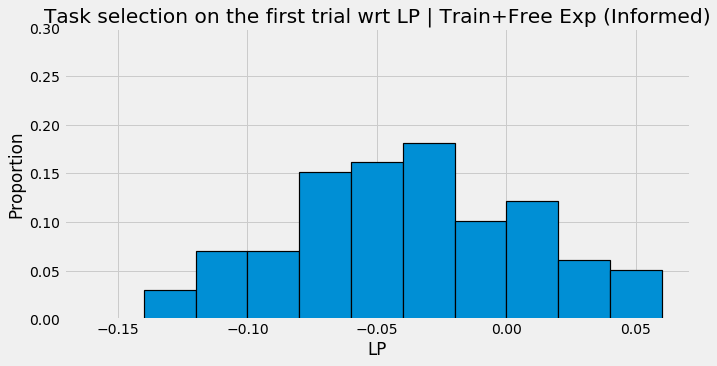

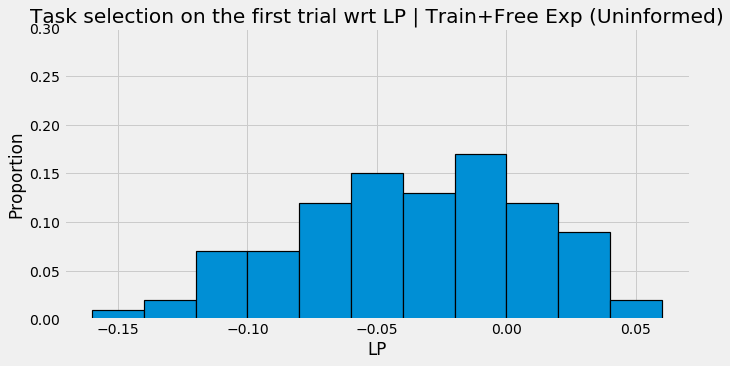

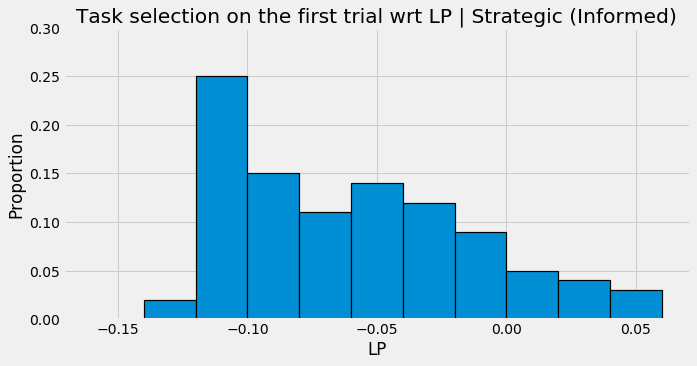

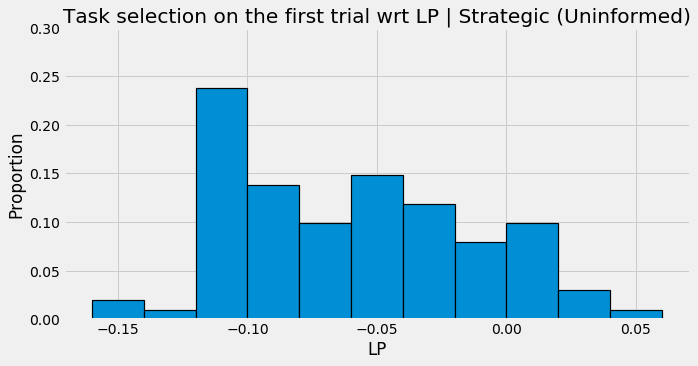

In [18]:
def plotLP(arr, label):
    # Create bins (0 - 0.03 in 0.001 steps)
    binsLP = np.arange(-0.16, 0.08, 0.02) 
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Normalize to sum 1
    weights = np.ones_like(arr)/len(arr)
    plt.hist(arr, bins=binsLP, weights=weights, edgecolor='black', linewidth=1.2)
    #plt.hist(arr, bins=binsLP, edgecolor='black', linewidth=1.2)
    
    #plt.hist(performance, bins=binsPC, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection on the first trial wrt LP | ', label]))
    ax.set_ylabel('Proportion')
    ax.set_xlabel('LP')
    ax.set_ylim([0,0.3])

plotLP(fslpFTI, 'Train+Free Exp (Informed)')
plotLP(fslpFTU, 'Train+Free Exp (Uninformed)')
plotLP(fslpSI, 'Strategic (Informed)')
plotLP(fslpSU, 'Strategic (Uninformed)')

#### Normal LP

Fits a linear regressor to the error curve

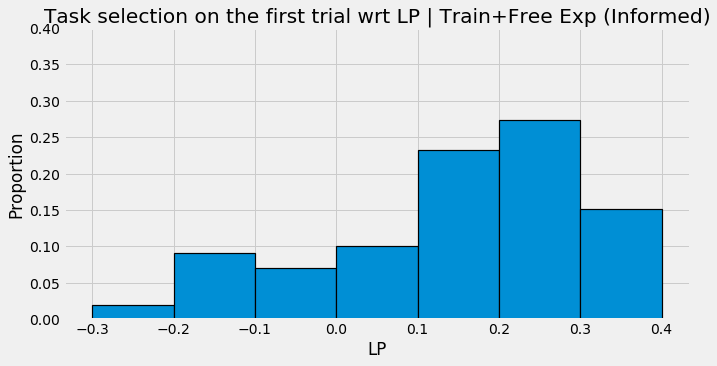

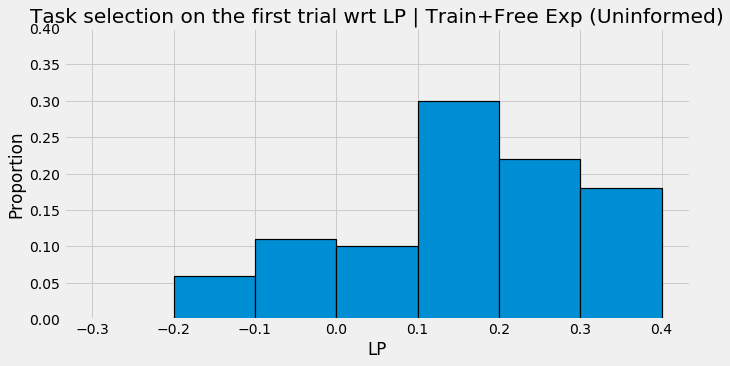

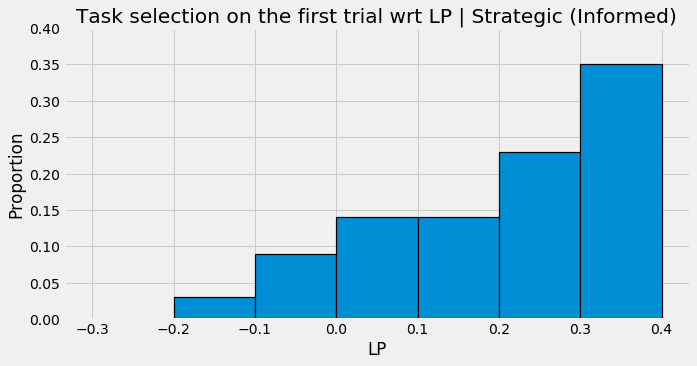

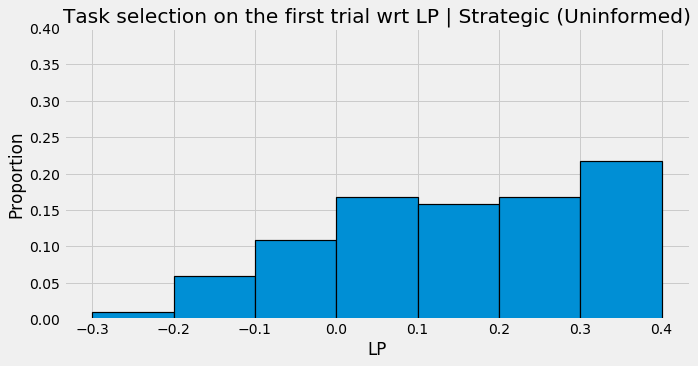

In [19]:
def getLPNormal(probs, userArr):
    lpsUser = []
    # Go through every user and task
    for u in range(userArr):
        #tmpU = diff[u]
        tmpU = probs[u]
        lps = []
        for t in range(tasks):
            # Convert prob to errors
            errT = 1-tmpU[t]
            # fit polinomial to error differences
            slope, intercept = np.polyfit(np.arange(len(errT)), errT, 1)
            x = np.linspace(0, len(errT)-1, 100)
            # LP = - [Fitted Error(present) - Fitted Error(past)]
            lp = -((slope*x[-1]+intercept)-(slope*x[0]+intercept))
            lps.append(lp)
            #print(slope*x[0]+intercept, slope*x[-1]+intercept, diffT, lp)
            #print(probs[u], errT, diffT, slope*x[0]+intercept, slope*x[-1]+intercept, lp)
        lpsUser.append(lps)
        
        #print(lpsUser)
    return np.asarray(lpsUser)

# Get LP
lpFTTI_N = getLPNormal(probsFTTI, usersFTI)
lpFTTU_N = getLPNormal(probsFTTU, usersFTU)
lpSTI_N = getLPNormal(probsSTI, usersSI)
lpSTU_N = getLPNormal(probsSTU, usersSU)
#print(np.shape(lpFTTI), lpFTTI)

# Associate training LP to first selection
fslpFTI_N = lpFTTI_N[np.arange(len(lpFTTI_N)), selFTI[0]]
fslpFTU_N = lpFTTU_N[np.arange(len(lpFTTU_N)), selFTU[0]]
fslpSI_N = lpSTI_N[np.arange(len(lpSTI_N)), selSI[0]]
fslpSU_N = lpSTU_N[np.arange(len(lpSTU_N)), selSU[0]]

def plotLP(arr, label):
    
    #performance = checkPerformance(arr, firstSelec)
    # Create bins (0 - 0.03 in 0.001 steps)
    binsLP = np.arange(-0.3, 0.5, 0.1) 
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Normalize to sum 1
    weights = np.ones_like(arr)/len(arr)
    plt.hist(arr, bins=binsLP, weights=weights, edgecolor='black', linewidth=1.2)
    #plt.hist(arr, bins=binsLP, edgecolor='black', linewidth=1.2)
    
    #plt.hist(performance, bins=binsPC, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection on the first trial wrt LP | ', label]))
    ax.set_ylabel('Proportion')
    ax.set_xlabel('LP')
    ax.set_ylim([0,0.4])
    
plotLP(fslpFTI_N, 'Train+Free Exp (Informed)')
plotLP(fslpFTU_N, 'Train+Free Exp (Uninformed)')
plotLP(fslpSI_N, 'Strategic (Informed)')
plotLP(fslpSU_N, 'Strategic (Uninformed)')

#### Binary LP

Obtains Learning Progress based on fitting a line on correct (0) and incorrect (1) answers.

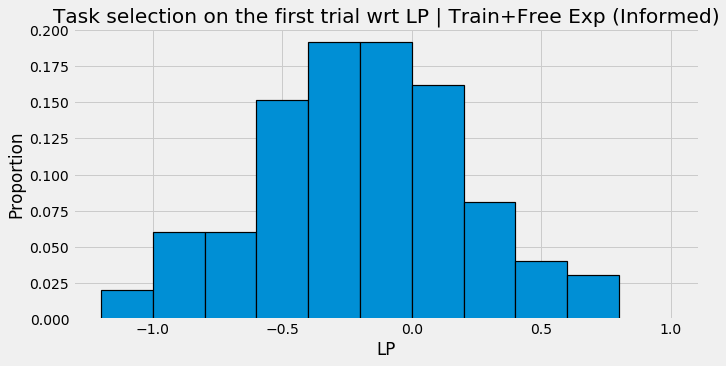

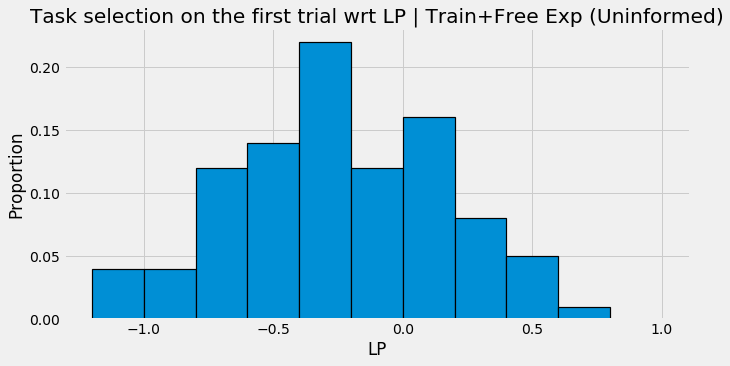

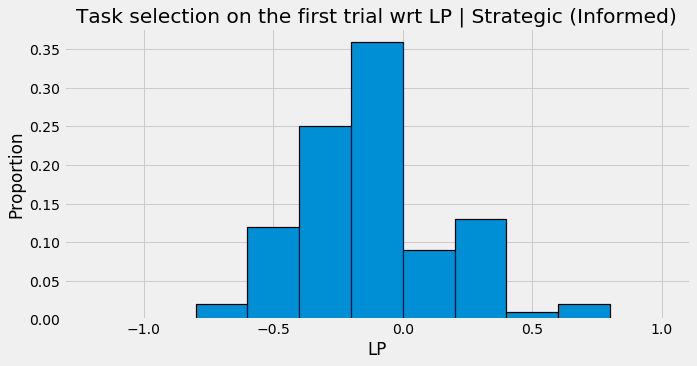

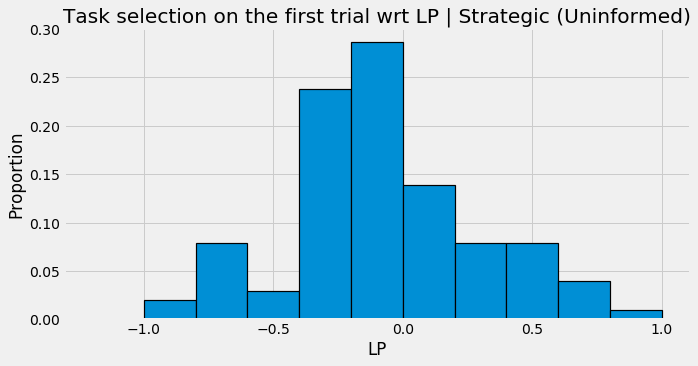

In [20]:
# Gets the p(correct) at each trial per task and per user
def extractSuccTrajec(arr, userArr):
    # Store p(correct) per user
    succUser = []
    # Go through user
    for u in range(userArr):
        tmpU = arr[u]
        # Init prior
        alpha,bet = 2,2
        # Store p(correct) = predicted accuracy evolution per task for user u
        succTask = []
        # Go through each task
        for t in range(tasks):
            # Split by task
            tmpT = tmpU[tmpU[:,1] == t]
            # Go through its trial history
            # store successes/errors in this task
            succ = []
            #print(np.mean(beta(alpha+succ, bet+(0+1)-succ).rvs(size=500)), alpha+succ, bet+0-succ)
            for trial in range(np.shape(tmpT)[0]):
                # Check if the answer was correct on this trial
                if tmpT[trial,2] == 1:
                    succ.append(0)
                else:
                    succ.append(1)
            succTask.append(succ)
        succUser.append(succTask)
    return np.asarray(succUser)

# Obtain predicted accuracy (e.g. "I predict based on my observations that my p(correct)=? if you ask me 
# to classify instances of this exercise without receiving any feedback")
succFTTI = extractSuccTrajec(splitInfFTT, usersFTI)
succFTTU = extractSuccTrajec(splitUniFTT, usersFTU)
succSTI = extractSuccTrajec(splitInfST, usersSI)
succSTU = extractSuccTrajec(splitUniST, usersSU)

def getLPBinary(probs, userArr):
    lpsUser = []
    # Go through every user and task
    for u in range(userArr):
        #tmpU = diff[u]
        tmpU = probs[u]
        lps = []
        for t in range(tasks):
            # Convert prob to errors
            errT = 1-tmpU[t]
            # fit polinomial to error differences
            slope, intercept = np.polyfit(np.arange(len(errT)), errT, 1)
            x = np.linspace(0, len(errT)-1, 100)
            # LP = - [Fitted Error(present) - Fitted Error(past)]
            lp = -((slope*x[-1]+intercept)-(slope*x[0]+intercept))
            lps.append(lp)
            #print(slope*x[0]+intercept, slope*x[-1]+intercept, diffT, lp)
            #print(probs[u], errT, diffT, slope*x[0]+intercept, slope*x[-1]+intercept, lp)
        lpsUser.append(lps)
        
        #print(lpsUser)
    return np.asarray(lpsUser)

# Get LP
lpFTTI_B = getLPBinary(succFTTI, usersFTI)
lpFTTU_B = getLPBinary(succFTTU, usersFTU)
lpSTI_B = getLPBinary(succSTI, usersSI)
lpSTU_B = getLPBinary(succSTU, usersSU)
#print(np.shape(lpFTTI), lpFTTI)

# Associate training LP to first selection
fslpFTI_B = lpFTTI_B[np.arange(len(lpFTTI_B)), selFTI[0]]
fslpFTU_B = lpFTTU_B[np.arange(len(lpFTTU_B)), selFTU[0]]
fslpSI_B = lpSTI_B[np.arange(len(lpSTI_B)), selSI[0]]
fslpSU_B = lpSTU_B[np.arange(len(lpSTU_B)), selSU[0]]

def plotLP(arr, label):
    
    #performance = checkPerformance(arr, firstSelec)
    # Create bins (0 - 0.03 in 0.001 steps)
    binsLP = np.arange(-1.2, 1.1, 0.2) 
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Normalize to sum 1
    weights = np.ones_like(arr)/len(arr)
    plt.hist(arr, bins=binsLP, weights=weights, edgecolor='black', linewidth=1.2)
    #plt.hist(arr, bins=binsLP, edgecolor='black', linewidth=1.2)
    
    #plt.hist(performance, bins=binsPC, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection on the first trial wrt LP | ', label]))
    ax.set_ylabel('Proportion')
    ax.set_xlabel('LP')
    #ax.set_ylim([0,0.37])
    
plotLP(fslpFTI_B, 'Train+Free Exp (Informed)')
plotLP(fslpFTU_B, 'Train+Free Exp (Uninformed)')
plotLP(fslpSI_B, 'Strategic (Informed)')
plotLP(fslpSU_B, 'Strategic (Uninformed)')

<a id='A7'></a>
## A7 - Relative Learning Progress

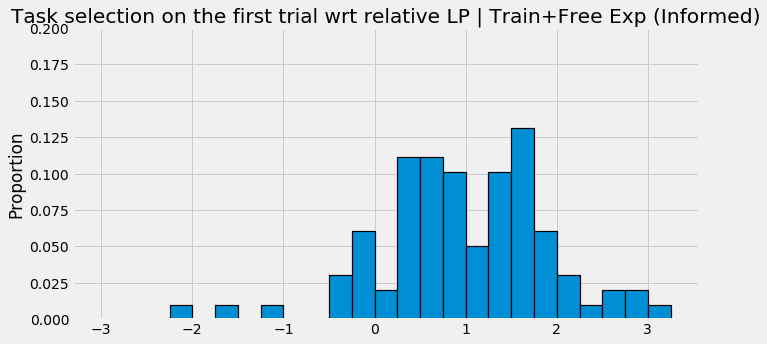

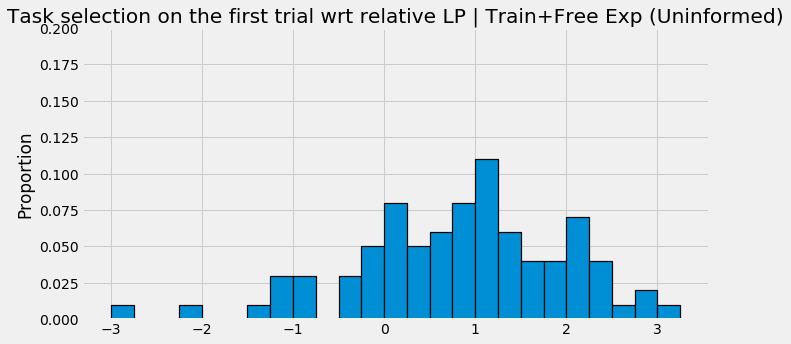

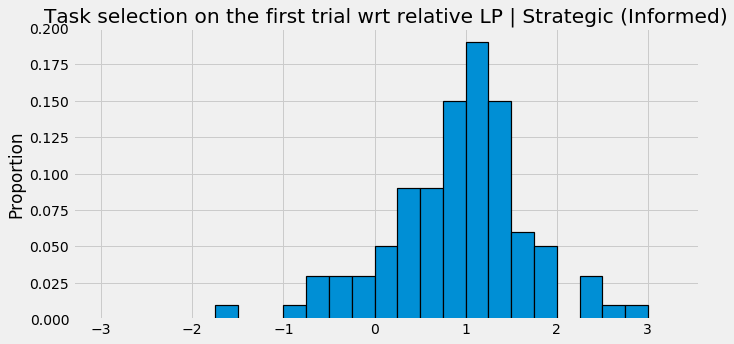

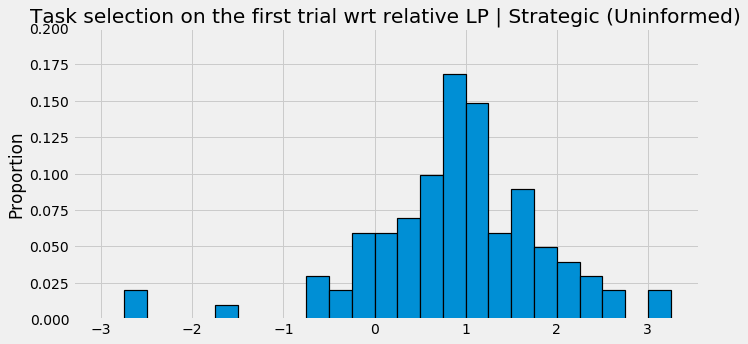

In [22]:
# Get relative training LP of the first task selected
def checkRelativeLP(lps, firstSelecLP):
    # Get average LP per user for the four tasks
    means = np.mean(lps, axis=1)
    # Normalize the LP of the task that was selected in relation to the mean
    normlp = firstSelecLP/means
    return normlp

def plotRelativeLP(arr, firstSelec, label, bin_min=-3.0, bin_max=3.3, bin_step=0.25):
    
    relLP = checkRelativeLP(arr, firstSelec)
    
    # Create bins (0 - 1 in 0.1 steps)
    #binsLP = np.linspace(0,2.1,22)
    binsLP = np.arange(bin_min, bin_max, bin_step) 
    
    fig, ax = plt.subplots(figsize=(10, 5))
    # Normalize to sum 1
    weights = np.ones_like(relLP)/len(relLP)
    #plt.hist(performance, bins=binsPC, weights=weights, edgecolor='black', linewidth=1.2)
    plt.hist(relLP, bins=binsLP, weights=weights, edgecolor='black', linewidth=1.2)
    
    #plt.hist(performance, bins=binsPC, edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(['Task selection on the first trial wrt relative LP | ', label]))
    ax.set_ylabel('Proportion')
    ax.set_ylim([0,0.2])
    
plotRelativeLP(lpFTTI,fslpFTI, 'Train+Free Exp (Informed)')
plotRelativeLP(lpFTTU,fslpFTU, 'Train+Free Exp (Uninformed)')
plotRelativeLP(lpSTI,fslpSI, 'Strategic (Informed)')
plotRelativeLP(lpSTU,fslpSU, 'Strategic (Uninformed)')

#### Relative LP (Normal)

In [ ]:
plotRelativeLP(lpFTTI_N,fslpFTI_N, 'Train+Free Exp (Informed)', -2.5, 7.5, 0.25)
plotRelativeLP(lpFTTU_N,fslpFTU_N, 'Train+Free Exp (Uninformed)', -2.5, 7.5, 0.25)
plotRelativeLP(lpSTI_N,fslpSI_N, 'Strategic (Informed)', -2.5, 7.5, 0.25)
plotRelativeLP(lpSTU_N,fslpSU_N, 'Strategic (Uninformed)', -2.5, 7.5, 0.25)

#### Relative LP (Binary)

In [ ]:
plotRelativeLP(lpFTTI_B,fslpFTI_B, 'Train+Free Exp (Informed)', -10.5, 10, 0.5)
plotRelativeLP(lpFTTU_B,fslpFTU_B, 'Train+Free Exp (Uninformed)', -10.5, 10, 0.5)
plotRelativeLP(lpSTI_B,fslpSI_B, 'Strategic (Informed)', -10.5, 10, 0.5)
plotRelativeLP(lpSTU_B,fslpSU_B, 'Strategic (Uninformed)', -10.5, 10, 0.5)